# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.0
pandas version: 2.2.3
matplotlib version: 3.9.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file
file_name = "Datasets and Dictionary-NYC/trip_records/2023-1.parquet"
df = pd.read_parquet(file_name)
# df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import time

# Select the folder having data files
os.chdir('Datasets and Dictionary-NYC/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
all_df_samples = []

start_time = time.time()
# iterate through the list of files and sample one by one:
for file_name in file_list:
    print('file_name--> ', file_name)
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_file_data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        current_file_data['date'] = current_file_data['tpep_pickup_datetime'].dt.date
        current_file_data['hour'] = current_file_data['tpep_pickup_datetime'].dt.hour
        current_file_date_unique = current_file_data['tpep_pickup_datetime'].dt.date.unique()

        # Loop through dates and then loop through every hour of each date
        for date in current_file_date_unique:
            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_data = current_file_data[(current_file_data['date'] == date) & (current_file_data['hour'] == hour)]
                
                # Sample 5% of the hourly data randomly
                sample_5 = hourly_data.sample(frac = 0.01, random_state = 42)
                
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample_5])

        all_df_samples.append(sampled_data)

        del sampled_data, current_file_data
        import gc
        gc.collect()
        # Concatenate the sampled data of all the dates to a single dataframe
        # df = pd.concat([df,sampled_data]) # we initialised this empty DF earlier
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

df = pd.concat(all_df_samples, ignore_index=True)

end_time =time.time()
print('final_time--> ', start_time-end_time)

file_name-->  2023-1.parquet
file_name-->  2023-10.parquet
file_name-->  2023-11.parquet
file_name-->  2023-12.parquet
file_name-->  2023-2.parquet
file_name-->  2023-3.parquet
file_name-->  2023-4.parquet
file_name-->  2023-5.parquet
file_name-->  2023-6.parquet
file_name-->  2023-7.parquet
file_name-->  2023-8.parquet
file_name-->  2023-9.parquet
final_time-->  -2851.239505290985


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
df.to_parquet('sample_trip_data_final.parquet')
df.to_csv('sample_trip_data_final.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
# no need to load, as "df" contains the same


In [29]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...          ...                  ...                   ...              ...   
379263         1  2023-09-30 23:18:16   2023-09-30 23:26:43              1.0   
379264         2  2023-09-30 23:39:11   2023-10-01 00:05:50              2.0   
379265         2  2023-09-30 23:25:31   2023-09-30 23:48:50              3.0   
379266         2  2023-09-30 23:54:53   2023-10-01 00:08:11              4.0   
379267         1  2023-09-30 23:36:14   2023-09-30 23:40:32              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N           138   
1                1.24         1.0                  N           161   
2                1.44         1.0                  N           237   
3                0.54         1.0                  N           143   
4               19.24         NaN               None            66   
...               ...         ...                ...           ...   
379263           1.10         1.0                  N           186   
379264           3.36         1.0                  N            79   
379265           4.97         1.0                  N           234   
379266           2.34         1.0                  N           148   
379267           1.40         1.0                  N           141   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                256             2  ...      0.5        0.00          0.00   
1                237             1  ...      0.5        2.58          0.00   
2                141             2  ...      0.5        0.00          0.00   
3                142             2  ...      0.5        0.00          0.00   
4                107             0  ...      0.5        5.93          0.00   
...              ...           ...  ...      ...         ...           ...   
379263           249             1  ...      0.5        1.00          0.00   
379264           163             2  ...      0.5        0.00          0.00   
379265           112             1  ...      0.5        5.00          6.94   
379266           170             2  ...      0.5        0.00          0.00   
379267           263             1  ...      0.5        3.20          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         41.15                   0.0   
1                         1.0         15.48                   2.5   
2                         1.0         16.40                   2.5   
3                         1.0         11.50                   2.5   
4                         1.0         35.57                   NaN   
...                       ...           ...                   ...   
379263                    1.0         15.30                   2.5   
379264                    1.0         29.70                   2.5   
379265                    1.0         43.74                   2.5   
379266                    1.0         20.60                   2.5   
379267                    1.0         16.10                   2.5   

        airport_fee        date  hour Airport_fee  
0              1.25  2023-01-01     0         NaN  
1              0.00  2023-01-01     0         NaN  
2              0.00  2023-01-01     0         NaN  
3              0.00  2023-01-01     0         NaN  
4               NaN  2023-01-01     0         NaN  
...             ...         ...   ...         ...  
379263          NaN  2023-09-30    23         0.0  
379264          NaN  202

In [19]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed
print(df.index)
df.reset_index(drop=True, inplace=True)
print(df.index)

RangeIndex(start=0, stop=379268, step=1)
RangeIndex(start=0, stop=379268, step=1)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [31]:
# Combine the two airport fee columns
df['Airport_fee_all'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

In [37]:
# Just checking the values are combined or not..
print(df['Airport_fee_all'].sum())
print(df['airport_fee'].sum())
print(df['Airport_fee'].sum())

51973.75
3221.25
48752.5


In [39]:
df.drop(columns=['airport_fee','Airport_fee'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [41]:
# check where values of fare amount are negative
(df.fare_amount < 0).value_counts()

fare_amount
False    379268
Name: count, dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [47]:
# Analyse RatecodeID for the negative fare amounts
df[df.fare_amount < 0].RatecodeID.value_counts()


Series([], Name: count, dtype: int64)

In [77]:
# Find which columns have negative values
(df.select_dtypes(include=['number']) < 0).sum()

VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     1
mta_tax                  15
tip_amount                0
tolls_amount              0
improvement_surcharge    15
total_amount             15
congestion_surcharge     10
hour                      0
Airport_fee_all           3
dtype: int64

In [125]:
# fix these negative values
# negative_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee_all']
df[['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee_all']] = df[['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee_all']].apply(lambda x : abs(x))

In [127]:
(df.select_dtypes(include=['number']) < 0).sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
hour                     0
Airport_fee_all          0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [145]:
# Find the proportion of missing values in each column
df.isnull().mean()*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.412363
trip_distance            0.000000
RatecodeID               3.412363
store_and_fwd_flag       3.412363
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.412363
date                     0.000000
hour                     0.000000
Airport_fee_all          0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [162]:
# Display the rows with null values
df[df.passenger_count.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...          ...                  ...                   ...              ...   
379146         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
379206         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
379225         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
379242         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   
379255         1  2023-09-30 23:38:37   2023-09-30 23:46:08              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
42               4.52         NaN               None           114   
43               9.19         NaN               None           239   
46               2.74         NaN               None            90   
...               ...         ...                ...           ...   
379146           0.00         NaN               None            48   
379206           3.01         NaN               None           163   
379225           0.00         NaN               None           161   
379242           0.00         NaN               None           249   
379255           0.00         NaN               None           231   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
42               262             0  ...    0.0      0.5        0.00   
43               256             0  ...    0.0      0.5        2.20   
46                48             0  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
379146           249             0  ...    0.0      0.5        0.00   
379206           262             0  ...    0.0      0.5        5.25   
379225            87             0  ...    0.0      0.5        0.00   
379242           231             0  ...    0.0      0.5        0.00   
379255           249             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
379146          0.00                    1.0         25.88   
379206          0.00                    1.0         31.50   
379225          0.00                    1.0         35.01   
379242          0.00                    1.0         24.65   
379255          0.00                    1.0         16.33   

        congestion_surcharge        date hour  Airport_fee_all  
4                        NaN  2023-01-01    0              0.0  
15                       NaN  2023-01-01    0              0.0  
42                       NaN  2023-01-01    0              0.0  
43                       NaN  2023-01-01    0              0.0  
46                       NaN  2023-01-01    0              0.0  
...                      ...         ...  ...              ...  
379146                   NaN  2023-09-30   22              0.0  
379206                   NaN  2023-09-30   23              0.0  
379225                   NaN  2023-

In [166]:
df.passenger_count.median()

np.float64(1.0)

In [168]:
# Impute NaN values in 'passenger_count'
df.passenger_count = df.passenger_count.fillna(df.passenger_count.median())

In [174]:
df[df.passenger_count.isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_all]
Index: []

[0 rows x 21 columns]

In [176]:
df.isnull().mean()*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               3.412363
store_and_fwd_flag       3.412363
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.412363
date                     0.000000
hour                     0.000000
Airport_fee_all          0.000000
dtype: float64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [180]:
# Fix missing values in 'RatecodeID'
df.RatecodeID = df.RatecodeID.fillna(df.RatecodeID.median())

In [182]:
df[df.RatecodeID.isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_all]
Index: []

[0 rows x 21 columns]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [190]:
# handle null values in congestion_surcharge
df.congestion_surcharge = df.congestion_surcharge.fillna(df.RatecodeID.median())

In [192]:
df[df.congestion_surcharge.isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_all]
Index: []

[0 rows x 21 columns]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [198]:
# Handle any remaining missing values
df.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
date                         0
hour                         0
Airport_fee_all              0
dtype: int64

In [216]:
df.drop(columns="store_and_fwd_flag", inplace=True)

In [218]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee_all          0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [220]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379268.000000                      379268                      379268   
mean        1.734193  2023-07-02 20:10:08.512407  2023-07-02 20:27:28.460094   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:26:38.750000  2023-04-02 16:44:00.250000   
50%         2.000000  2023-06-27 16:07:21.500000  2023-06-27 16:21:37.500000   
75%         2.000000         2023-10-06 19:39:01  2023-10-06 19:53:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447397                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379268.000000  379268.000000  379268.000000  379268.000000   
mean          1.354657       3.611285       1.622644     165.262672   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.878018      49.391070       7.333470      64.020218   

        DOLocationID   payment_type    fare_amount          extra  \
count  379268.000000  379268.000000  379268.000000  379268.000000   
mean      163.989997       1.163394      20.175333       1.582702   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772137       0.507365     233.143157       1.821107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        0.495393       3.540784       0.589633               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048212       4.024369       2.175130               0.028366   

        total_amount  congestion_surcharge           hour  Airport_fee_all  
count  379268.000000         379268.000000  379268.000000    379268.000000  
mean       29.222285              2.264275      14.264818         0.137065  
min         0.000000              0.000000       0.000000         0.000000  
25%        15.960000              2.500000      11.000000         0.000000  
50%        21.000000              2.500000      15.000000         0.000000  
75%        30.750000              2.500000      19.000000         0.000000  
max    143167.450000              2.500000      23.000000         1.750000  
std       233.532409              0.694667       5.807372         0.455966

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

In [266]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
print('Entries where trip_distance is nearly 0 and fare_amount is more than 300:', 
      len(df[(df.trip_distance < 0.1) & (df.fare_amount > 300)]))

Entries where trip_distance is nearly 0 and fare_amount is more than 300: 7


In [268]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
print('Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones):', 
      len(df[(df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID)]))

Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones): 9


In [270]:
# Entries where trip_distance is more than 250 miles.
print('Entries where trip_distance is more than 250 miles:', 
      len(df[(df.trip_distance > 250)]))

Entries where trip_distance is more than 250 miles: 6


In [272]:
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
print('Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary):',
     len(df[(df.payment_type == 0)]))

Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary): 12942


How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [274]:
# remove passenger_count > 6
df = df[df.passenger_count <= 6]
df.passenger_count.describe()

count    379263.000000
mean          1.354572
std           0.877708
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64

In [294]:
# just for backup
df1 = df

In [296]:
df1.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  366299.000000                      366299                      366299   
mean        1.737389  2023-07-01 21:29:34.571735  2023-07-01 21:46:50.341682   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-01 20:56:42         2023-04-01 21:08:10   
50%         2.000000         2023-06-26 08:39:22         2023-06-26 08:54:03   
75%         2.000000         2023-10-05 19:24:09         2023-10-05 19:39:01   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.440053                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    366299.000000  366299.000000  366299.000000  366299.000000   
mean          1.367094       3.433235       1.644190     165.422518   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.060000       1.000000     132.000000   
50%           1.000000       1.780000       1.000000     162.000000   
75%           1.000000       3.350000       1.000000     234.000000   
max           6.000000     187.350000      99.000000     265.000000   
std           0.890472       4.532972       7.459436      63.700802   

        DOLocationID   payment_type    fare_amount          extra  \
count  366299.000000  366299.000000  366299.000000  366299.000000   
mean      164.253948       1.204461      20.079659       1.632769   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.721572       0.465781     237.206716       1.828027   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  366299.000000  366299.000000  366299.000000          366299.000000   
mean        0.495468       3.567627       0.588688               0.999347   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.047847       4.033941       2.171217               0.023761   

        total_amount  congestion_surcharge           hour  Airport_fee_all  
count  366299.000000         366299.000000  366299.000000    366299.000000  
mean       29.187757              2.309056      14.299471         0.141903  
min         0.000000              0.000000       0.000000         0.000000  
25%        15.960000              2.500000      11.000000         0.000000  
50%        21.000000              2.500000      15.000000         0.000000  
75%        30.600000              2.500000      19.000000         0.000000  
max    143167.450000              2.500000      23.000000         1.750000  
std       237.594309              0.664004       5.774557         0.463203

In [290]:
# Continue with outlier handling

# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df.trip_distance <= 0.1) & (df.fare_amount >= 300))]

# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID))]

# Entries where trip_distance is more than 250 miles.
df = df[~((df.trip_distance > 250))]

# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[~((df.payment_type == 0))]

In [298]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  366299.000000                      366299                      366299   
mean        1.737389  2023-07-01 21:29:34.571735  2023-07-01 21:46:50.341682   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-01 20:56:42         2023-04-01 21:08:10   
50%         2.000000         2023-06-26 08:39:22         2023-06-26 08:54:03   
75%         2.000000         2023-10-05 19:24:09         2023-10-05 19:39:01   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.440053                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    366299.000000  366299.000000  366299.000000  366299.000000   
mean          1.367094       3.433235       1.644190     165.422518   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.060000       1.000000     132.000000   
50%           1.000000       1.780000       1.000000     162.000000   
75%           1.000000       3.350000       1.000000     234.000000   
max           6.000000     187.350000      99.000000     265.000000   
std           0.890472       4.532972       7.459436      63.700802   

        DOLocationID   payment_type    fare_amount          extra  \
count  366299.000000  366299.000000  366299.000000  366299.000000   
mean      164.253948       1.204461      20.079659       1.632769   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.721572       0.465781     237.206716       1.828027   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  366299.000000  366299.000000  366299.000000          366299.000000   
mean        0.495468       3.567627       0.588688               0.999347   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.047847       4.033941       2.171217               0.023761   

        total_amount  congestion_surcharge           hour  Airport_fee_all  
count  366299.000000         366299.000000  366299.000000    366299.000000  
mean       29.187757              2.309056      14.299471         0.141903  
min         0.000000              0.000000       0.000000         0.000000  
25%        15.960000              2.500000      11.000000         0.000000  
50%        21.000000              2.500000      15.000000         0.000000  
75%        30.600000              2.500000      19.000000         0.000000  
max    143167.450000              2.500000      23.000000         1.750000  
std       237.594309              0.664004       5.774557         0.463203

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366299 entries, 0 to 379267
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               366299 non-null  int64         
 1   tpep_pickup_datetime   366299 non-null  datetime64[us]
 2   tpep_dropoff_datetime  366299 non-null  datetime64[us]
 3   passenger_count        366299 non-null  float64       
 4   trip_distance          366299 non-null  float64       
 5   RatecodeID             366299 non-null  float64       
 6   PULocationID           366299 non-null  int64         
 7   DOLocationID           366299 non-null  int64         
 8   payment_type           366299 non-null  int64         
 9   fare_amount            366299 non-null  float64       
 10  extra                  366299 non-null  float64       
 11  mta_tax                366299 non-null  float64       
 12  tip_amount             366299 non-null  float64  

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [300]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee_all']

In [306]:
# removing 'date' and 'hour' columns.
df.drop(columns=['date','hour'], inplace=True)
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee_all']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

All are Numerical -->
* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

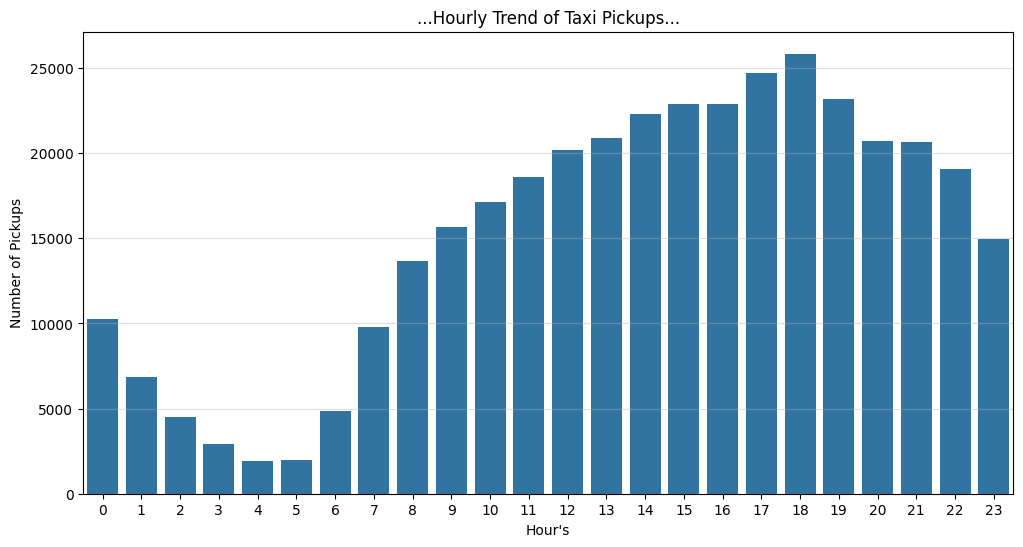

In [362]:
# Find and show the hourly trends in taxi pickups
hourly_trends = df.tpep_pickup_datetime.dt.hour.value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trends.index, y=hourly_trends.values)
plt.xticks(range(0, 24))
plt.xlabel("Hour's")
plt.ylabel("Number of Pickups")
plt.title("...Hourly Trend of Taxi Pickups...")
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

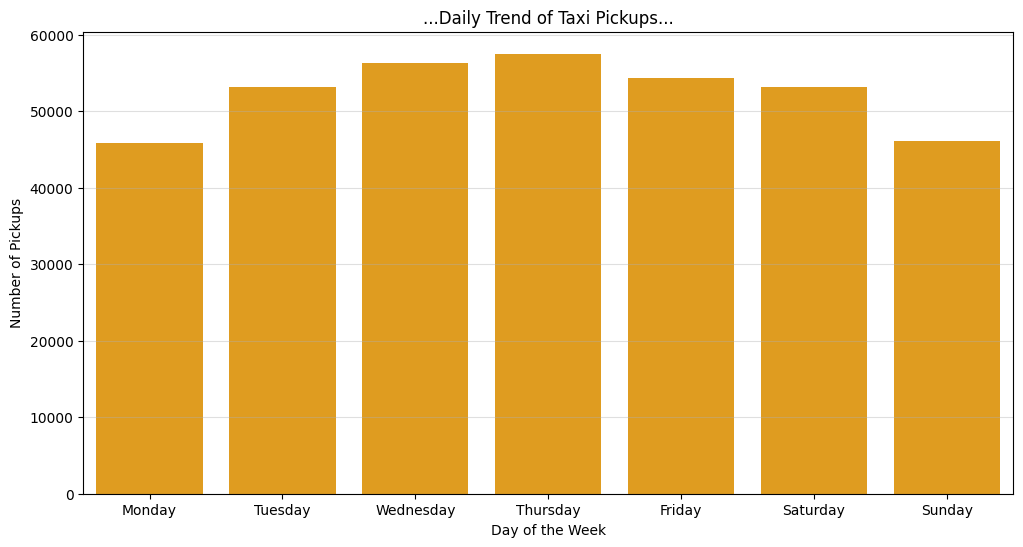

In [374]:
# Find and show the daily trends in taxi pickups (days of the week)
day_trends = df.tpep_pickup_datetime.dt.dayofweek.value_counts().sort_index()
plt.figure(figsize=(12, 6))
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(x=day_labels, y=day_trends.values, color="orange")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("...Daily Trend of Taxi Pickups...")
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()


In [386]:
print(df.tpep_pickup_datetime.dt.hour.value_counts().sort_index())
print(df.tpep_pickup_datetime.dt.day_name().value_counts().sort_index())
print(df.tpep_pickup_datetime.dt.dayofweek.value_counts().sort_index())
print(df.tpep_pickup_datetime.dt.month.value_counts().sort_index())

tpep_pickup_datetime
0     10243
1      6827
2      4502
3      2926
4      1892
5      1973
6      4835
7      9814
8     13642
9     15655
10    17134
11    18616
12    20195
13    20873
14    22317
15    22883
16    22858
17    24728
18    25835
19    23187
20    20716
21    20625
22    19048
23    14975
Name: count, dtype: int64
tpep_pickup_datetime
Friday       54299
Monday       45774
Saturday     53158
Sunday       46075
Thursday     57500
Tuesday      53174
Wednesday    56319
Name: count, dtype: int64
tpep_pickup_datetime
0    45774
1    53174
2    56319
3    57500
4    54299
5    53158
6    46075
Name: count, dtype: int64
tpep_pickup_datetime
1     29673
2     28151
3     32828
4     31683
5     33807
6     31812
7     27930
8     27063
9     26788
10    33388
11    31648
12    31528
Name: count, dtype: int64


tpep_pickup_datetime
0    45774
1    53174
2    56319
3    57500
4    54299
5    53158
6    46075
Name: count, dtype: int64

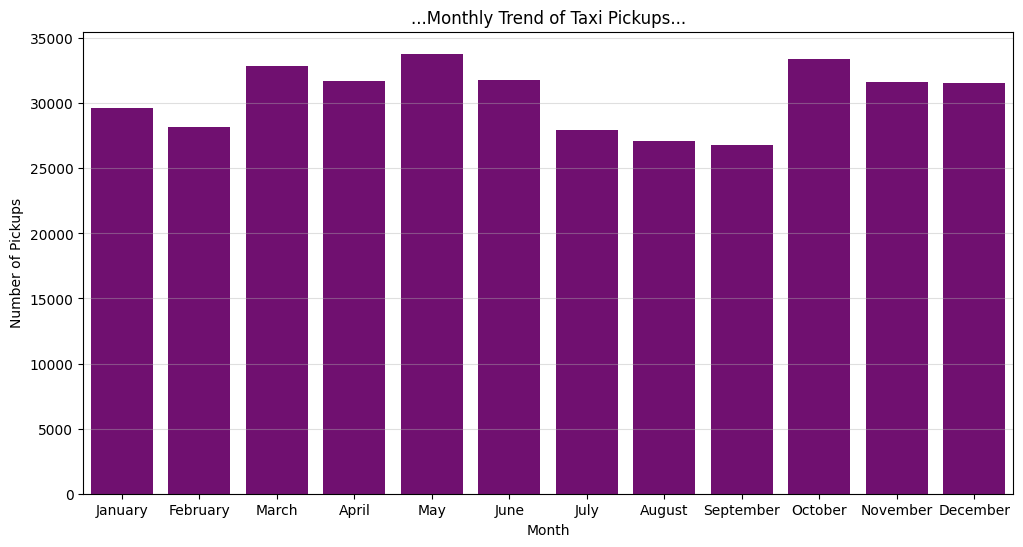

In [1187]:
# Show the monthly trends in pickups
monthly_trends = df.tpep_pickup_datetime.dt.month.value_counts().sort_index()
monthly_trends.index = monthly_trends.index.map(
    {1:'January', 2:'February', 3:'March', 4:'April', 
     5:'May', 6:'June', 7:'July', 8:'August', 
     9:'September', 10:'October', 11:'November', 12:'December'})
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, color="purple")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("...Monthly Trend of Taxi Pickups...")
plt.grid(axis='y', linestyle='-', alpha=0.4)

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [426]:
# Analyse the above parameters
col = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for c in col:
    print(df[c].describe())
    print('Negative count--> ', (df[c] < 0).sum())


count    366299.000000
mean         20.079659
std         237.206716
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max      143163.450000
Name: fare_amount, dtype: float64
Negative count-->  0
count    366299.000000
mean          3.567627
std           4.033941
min           0.000000
25%           1.000000
50%           2.860000
75%           4.420000
max         150.290000
Name: tip_amount, dtype: float64
Negative count-->  0
count    366299.000000
mean         29.187757
std         237.594309
min           0.000000
25%          15.960000
50%          21.000000
75%          30.600000
max      143167.450000
Name: total_amount, dtype: float64
Negative count-->  0
count    366299.000000
mean          3.433235
std           4.532972
min           0.000000
25%           1.060000
50%           1.780000
75%           3.350000
max         187.350000
Name: trip_distance, dtype: float64
Negative count-->  0


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366299 entries, 0 to 379267
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               366299 non-null  int64         
 1   tpep_pickup_datetime   366299 non-null  datetime64[us]
 2   tpep_dropoff_datetime  366299 non-null  datetime64[us]
 3   passenger_count        366299 non-null  float64       
 4   trip_distance          366299 non-null  float64       
 5   RatecodeID             366299 non-null  float64       
 6   PULocationID           366299 non-null  int64         
 7   DOLocationID           366299 non-null  int64         
 8   payment_type           366299 non-null  int64         
 9   fare_amount            366299 non-null  float64       
 10  extra                  366299 non-null  float64       
 11  mta_tax                366299 non-null  float64       
 12  tip_amount             366299 non-null  float64  

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [428]:
# Create a df with non zero entries for the selected parameters.
df_non_zeros = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0) & (df['tip_amount'] > 0)].copy()
df_non_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284580 entries, 1 to 379267
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284580 non-null  int64         
 1   tpep_pickup_datetime   284580 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284580 non-null  datetime64[us]
 3   passenger_count        284580 non-null  float64       
 4   trip_distance          284580 non-null  float64       
 5   RatecodeID             284580 non-null  float64       
 6   PULocationID           284580 non-null  int64         
 7   DOLocationID           284580 non-null  int64         
 8   payment_type           284580 non-null  int64         
 9   fare_amount            284580 non-null  float64       
 10  extra                  284580 non-null  float64       
 11  mta_tax                284580 non-null  float64       
 12  tip_amount             284580 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

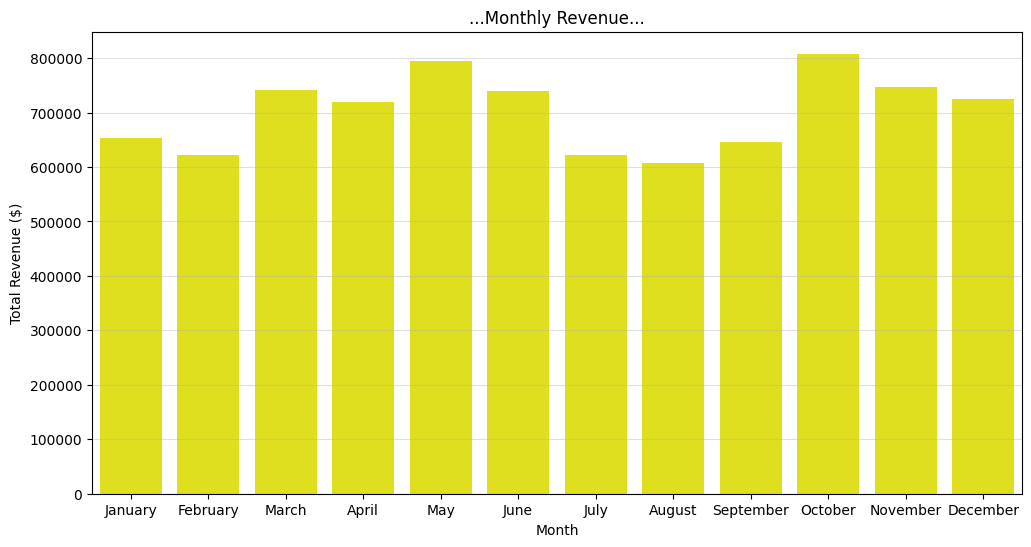

In [465]:
# Group data by month and analyse monthly revenue
total_amount = df_non_zeros.groupby(df.tpep_pickup_datetime.dt.month).total_amount.sum()
total_amount.index = total_amount.index.map(
    {1:'January', 2:'February', 3:'March', 4:'April', 
     5:'May', 6:'June', 7:'July', 8:'August', 
     9:'September', 10:'October', 11:'November', 12:'December'})
plt.figure(figsize=(12, 6))
sns.barplot(x=total_amount.index, y=total_amount.values, color="yellow")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("...Monthly Revenue...")
plt.grid(axis='y', linestyle='-', alpha=0.4)

plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [469]:
df_non_zeros['pickup_hour'] = df_non_zeros.tpep_pickup_datetime.dt.hour
df_non_zeros['pickup_month'] = df_non_zeros.tpep_pickup_datetime.dt.month
df_non_zeros['pickup_quarter'] = df_non_zeros.tpep_pickup_datetime.dt.quarter
df_non_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284580 entries, 1 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284580 non-null  int64         
 1   tpep_pickup_datetime   284580 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284580 non-null  datetime64[us]
 3   passenger_count        284580 non-null  float64       
 4   trip_distance          284580 non-null  float64       
 5   RatecodeID             284580 non-null  float64       
 6   PULocationID           284580 non-null  int64         
 7   DOLocationID           284580 non-null  int64         
 8   payment_type           284580 non-null  int64         
 9   fare_amount            284580 non-null  float64       
 10  extra                  284580 non-null  float64       
 11  mta_tax                284580 non-null  float64       
 12  tip_amount             284580 non-null  float64  

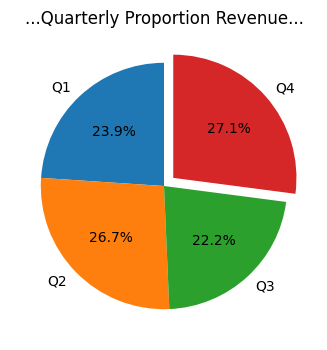

In [489]:
# Calculate proportion of each quarter
df_non_zeros['pickup_quarter'] = pd.cut(df_non_zeros.pickup_month,[0, 3, 6, 9, 12], labels=["Q1", "Q2", "Q3", "Q4"])
quarterly_revenue = df_non_zeros.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion=(quarterly_revenue / quarterly_revenue.sum()) * 100
plt.figure(figsize=(8, 4))
plt.pie(revenue_prop, labels=revenue_prop.index,autopct='%1.1f%%',startangle=90, explode=(0,0,0,0.1))
plt.title("...Quarterly Proportion Revenue...")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

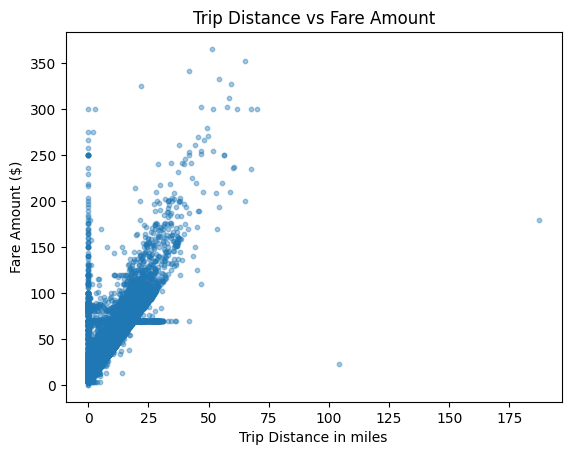

In [510]:
# Show how trip fare is affected by distance

plt.scatter(df_non_zeros.trip_distance, df_non_zeros.fare_amount, alpha=0.4, s=10)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance in miles')
plt.ylabel('Fare Amount ($)')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

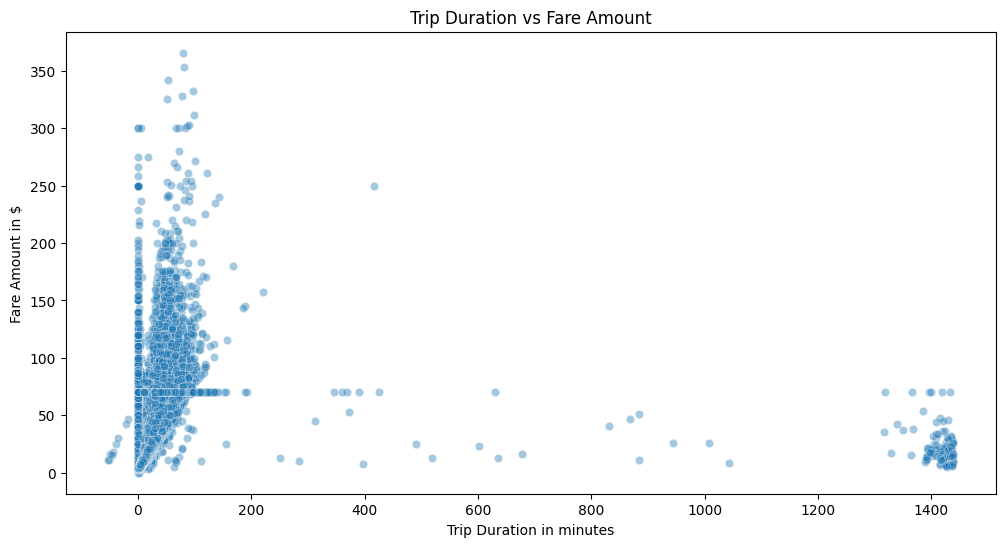

In [540]:
# Show relationship between fare and trip duration
df_non_zeros["trip_duration"] = (df_non_zeros.tpep_dropoff_datetime - df_non_zeros.tpep_pickup_datetime).dt.total_seconds() / 60
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_non_zeros.trip_duration, y=df_non_zeros.fare_amount, alpha=0.4)
plt.xlabel("Trip Duration in minutes")
plt.ylabel("Fare Amount in $")
plt.title("Trip Duration vs Fare Amount")
plt.show()


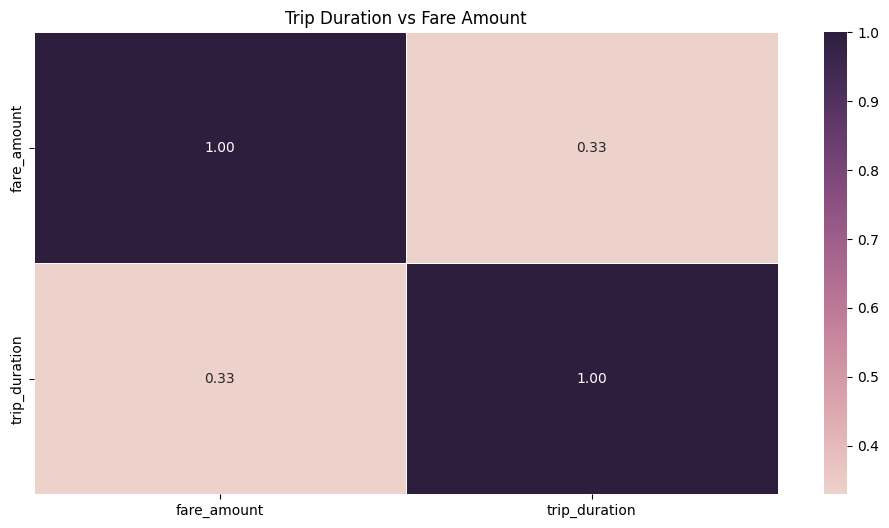

In [542]:
df_non_zeros['trip_duration'] = (df_non_zeros.tpep_dropoff_datetime - df_non_zeros.tpep_pickup_datetime).dt.total_seconds() / 60
plt.figure(figsize=(12, 6))
sns.heatmap(df_non_zeros[['fare_amount', 'trip_duration']].corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidths=0.4, fmt='.2f')
plt.title("Trip Duration vs Fare Amount")
plt.show()

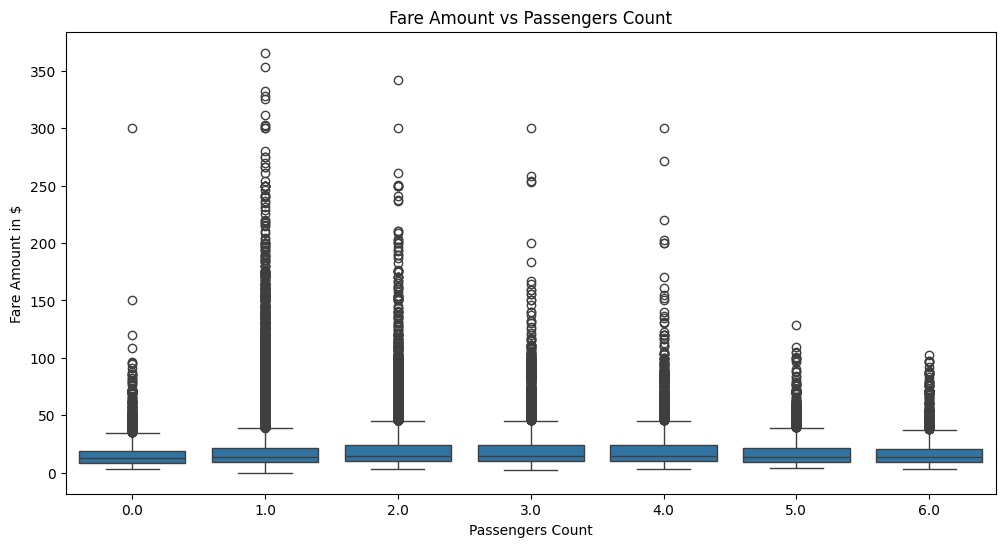

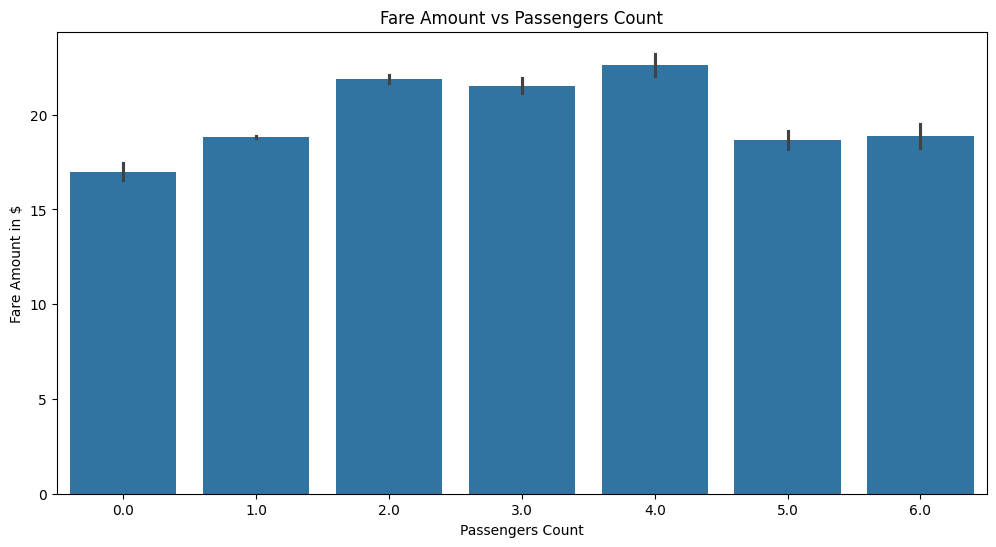

In [548]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_non_zeros.passenger_count, y=df_non_zeros.fare_amount)
plt.xlabel("Passengers Count")
plt.ylabel("Fare Amount in $")
plt.title("Fare Amount vs Passengers Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=df_non_zeros.passenger_count, y=df_non_zeros.fare_amount)
plt.xlabel("Passengers Count")
plt.ylabel("Fare Amount in $")
plt.title("Fare Amount vs Passengers Count")
plt.show()

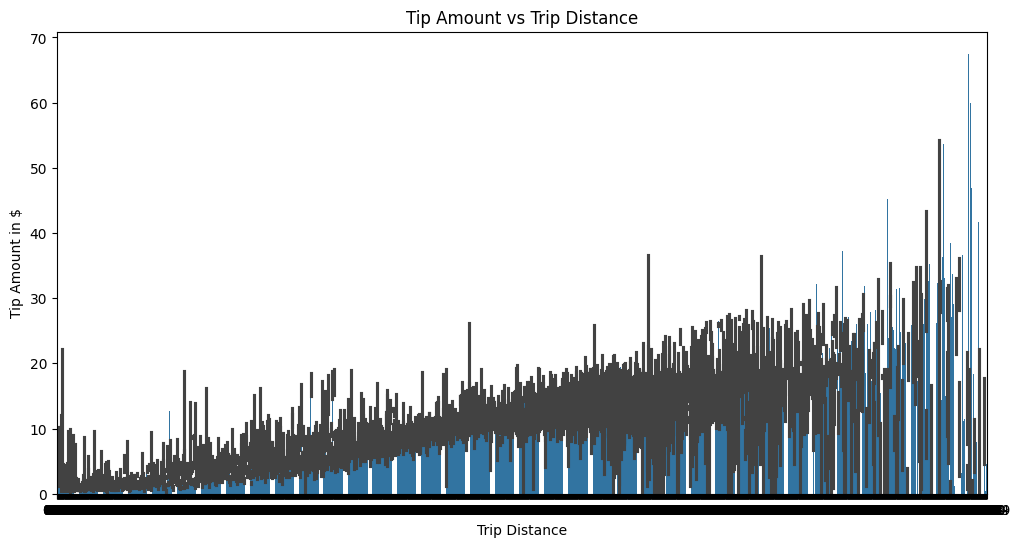

In [552]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))
sns.barplot(x=df_non_zeros.tip_amount, y=df_non_zeros.trip_distance)
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount in $")
plt.title("Tip Amount vs Trip Distance")
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

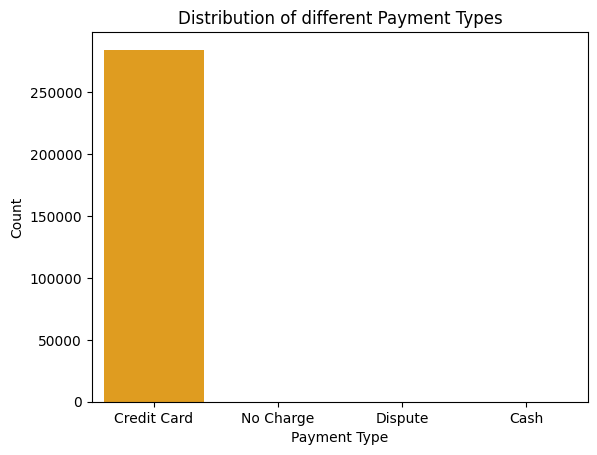

payment_type
1    284555
3        13
4         7
2         5
Name: count, dtype: int64


In [571]:
# Analyse the distribution of different payment types (payment_type).
payment_names = {
        1: 'Credit Card',
        2: 'Cash',
        3: 'No Charge',
        4: 'Dispute'
    }
payment_counts = df_non_zeros.payment_type.value_counts()
payment_counts.index = payment_counts.index.map(payment_names)

sns.barplot(x=payment_counts.index, y=payment_counts.values, color='Orange')
plt.title('Distribution of different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

print(df_non_zeros.payment_type.value_counts())


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [569]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ------------ --------------------------- 5.0/16.2 MB 23.2 MB/s eta 0:00:01
   -------------------------- ------------- 10.7/16.2 MB 25.8 MB/s eta 0:00:01
   --------------------------------- ------ 13.6/16.2 MB 29.5 MB/s eta 0:00:01
   ------------------------------------- -- 15.2/16.2 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 38.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 38.1 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [577]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"E:\Master's\Course 1 - SQL and Statistics Essentials\M7 - EDA Assignment - NYC Taxi Records Analysis\Starter-Notebook-EDA-NYC-Taxi\Datasets and Dictionary-NYC\taxi_zones\taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

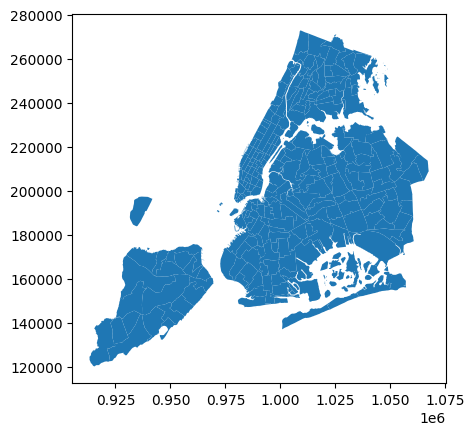

In [579]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [581]:
# Merge zones and trip records using locationID and PULocationID
zones_df = pd.merge(df_non_zeros, zones, how='left', left_on='PULocationID', right_on='LocationID')
zones_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284585 entries, 0 to 284584
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284585 non-null  int64         
 1   tpep_pickup_datetime   284585 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284585 non-null  datetime64[us]
 3   passenger_count        284585 non-null  float64       
 4   trip_distance          284585 non-null  float64       
 5   RatecodeID             284585 non-null  float64       
 6   PULocationID           284585 non-null  int64         
 7   DOLocationID           284585 non-null  int64         
 8   payment_type           284585 non-null  int64         
 9   fare_amount            284585 non-null  float64       
 10  extra                  284585 non-null  float64       
 11  mta_tax                284585 non-null  float64       
 12  tip_amount             284585 non-null  floa

In [633]:
zones_df.rename(columns={"zone": "Pickup_zone", "borough": "Pickup_borough"}, inplace=True)
zones_df.drop(columns=["OBJECTID", "Shape_Leng", "Shape_Area", "geometry", "LocationID"], inplace=True)
zones_df.info()

KeyError: "['OBJECTID', 'Shape_Leng', 'Shape_Area', 'geometry'] not found in axis"

In [637]:
zones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284585 entries, 0 to 284584
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284585 non-null  int64         
 1   tpep_pickup_datetime   284585 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284585 non-null  datetime64[us]
 3   passenger_count        284585 non-null  float64       
 4   trip_distance          284585 non-null  float64       
 5   RatecodeID             284585 non-null  float64       
 6   LocationID             284585 non-null  int64         
 7   DOLocationID           284585 non-null  int64         
 8   payment_type           284585 non-null  int64         
 9   fare_amount            284585 non-null  float64       
 10  extra                  284585 non-null  float64       
 11  mta_tax                284585 non-null  float64       
 12  tip_amount             284585 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [639]:
# Group data by location and calculate the number of trips
number_of_trips=zones_df.groupby('LocationID').size().reset_index(name='Trip_counts')
number_of_trips.head()

LocationID  Trip_counts
0           1           26
1           4          271
2           6            1
3           7           50
4           9            1

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [641]:
# Merge trip counts back to the zones GeoDataFrame
zones_df1 = zones.merge(number_of_trips, how='left',on='LocationID')
zones_df1.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     263 non-null    int32   
 1   Shape_Leng   263 non-null    float64 
 2   Shape_Area   263 non-null    float64 
 3   zone         263 non-null    object  
 4   LocationID   263 non-null    int32   
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
 7   Trip_counts  177 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


In [643]:
zones_df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     263 non-null    int32   
 1   Shape_Leng   263 non-null    float64 
 2   Shape_Area   263 non-null    float64 
 3   zone         263 non-null    object  
 4   LocationID   263 non-null    int32   
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
 7   Trip_counts  177 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

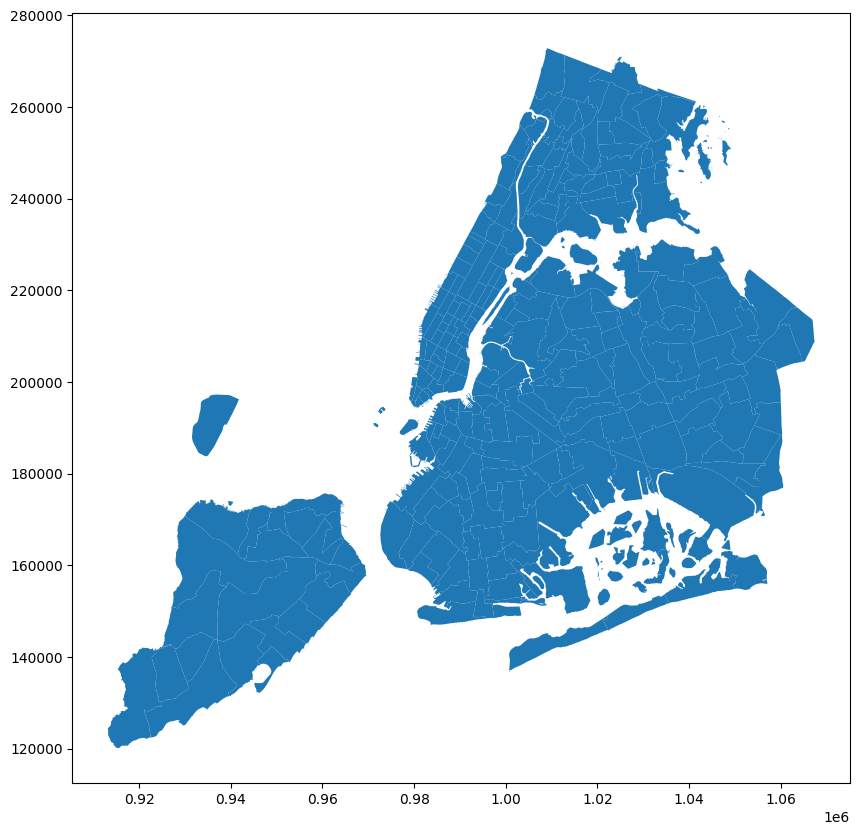

In [653]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_df1.plot(legend=True, ax=ax)
plt.show()


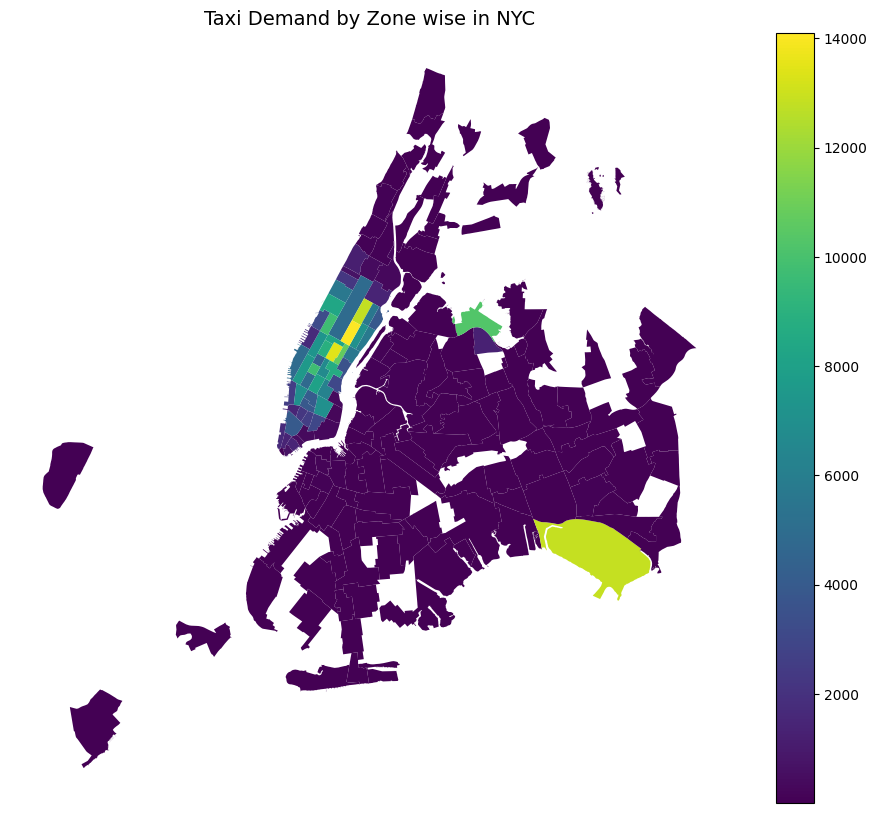

Taxi Demand by Zone wise in NYC
                             zone    borough  Trip_counts
236         Upper East Side South  Manhattan      14099.0
160                Midtown Center  Manhattan      13470.0
131                   JFK Airport     Queens      12882.0
235         Upper East Side North  Manhattan      12827.0
161                  Midtown East  Manhattan      10701.0
137             LaGuardia Airport     Queens      10258.0
141           Lincoln Square East  Manhattan       9742.0
185  Penn Station/Madison Sq West  Manhattan       9716.0
229     Times Sq/Theatre District  Manhattan       8885.0
169                   Murray Hill  Manhattan       8653.0
238         Upper West Side South  Manhattan       8334.0
162                 Midtown North  Manhattan       8258.0
233                      Union Sq  Manhattan       8095.0
67                   East Chelsea  Manhattan       7567.0
47                   Clinton East  Manhattan       7313.0
140               Lenox Hill West  Manha

In [665]:
# can you try displaying the zones DF sorted by the number of trips?
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones_df1.plot(column="Trip_counts", linewidth=0.5, legend=True, ax=ax)

ax.set_title("Taxi Demand by Zone wise in NYC", fontsize=14)
ax.set_axis_off()

plt.show()

zones_demand_list = zones_df1.sort_values(by="Trip_counts", ascending=False)
print("Taxi Demand by Zone wise in NYC")
print(zones_demand_list[["zone", "borough", "Trip_counts"]].head(20))


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [667]:
# Find routes which have the slowest speeds at different times of the day
grouped_data = zones_df.groupby(['LocationID','DOLocationID','pickup_hour'])[['trip_distance','trip_duration']].agg(func='mean').reset_index()
grouped_data['speed'] = grouped_data['trip_distance']/ grouped_data['trip_duration']

slowest_speeds = grouped_data['speed'].quantile(0.10)
slow_routes = grouped_data[grouped_data['speed'] < slowest_speeds]
slow_routes

LocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
0               1             1            5          0.000       0.241667   
1               1             1            6          0.010       0.116667   
2               1             1            7          0.000       0.116667   
3               1             1            9          0.000       0.208333   
4               1             1           10          0.000       0.283333   
...           ...           ...          ...            ...            ...   
59286         265           265           13          0.000       0.133333   
59287         265           265           14          0.000       0.075000   
59292         265           265           19          0.000       0.179167   
59294         265           265           21          0.000       0.116667   
59295         265           265           22          0.065       0.595000   

          speed  
0      0.000000  
1      0.085714  
2      0.000000  
3      0.000000  
4      0.000000  
...         ...  
59286  0.000000  
59287  0.000000  
59292  0.000000  
59294  0.000000  
59295  0.109244  

[5930 rows x 6 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

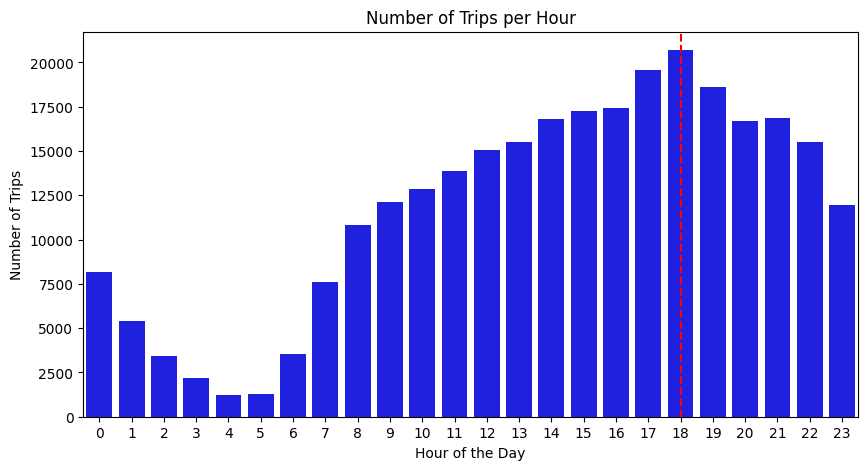

In [685]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = zones_df.groupby('pickup_hour').size()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, color="blue")
peek_hour = hourly_trips.idxmax()
peek_hour_count = hourly_trips.max()
plt.axvline(x=peek_hour, color="red", linestyle="--")
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [701]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

scaledtrips_by_hour_scaled = hourly_trips / sample_fraction
print(scaledtrips_by_hour_scaled)



pickup_hour
0      81500.0
1      53930.0
2      34370.0
3      21630.0
4      12410.0
5      12880.0
6      35140.0
7      76080.0
8     108010.0
9     120990.0
10    128580.0
11    138950.0
12    150710.0
13    155190.0
14    168310.0
15    172700.0
16    174460.0
17    195890.0
18    207010.0
19    185950.0
20    167170.0
21    168920.0
22    155340.0
23    119730.0
dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

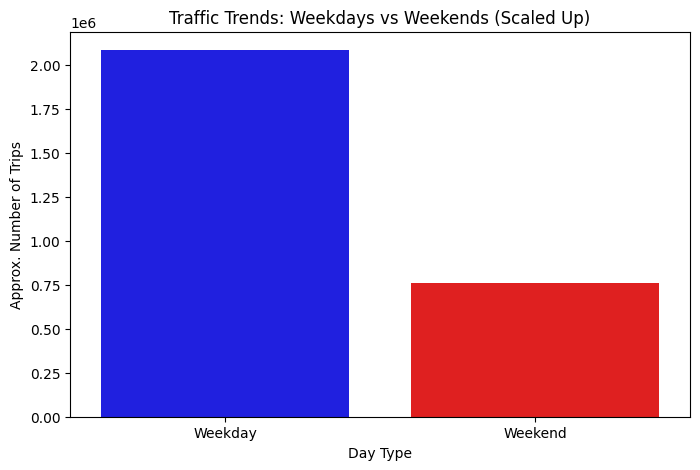

Approx Number of Trips (Scaled Up): day_type
Weekday    2083900
Weekend     761950
Name: count, dtype: int64


In [747]:
# Compare traffic trends for the week days and weekends
zones_df["pickup_day"] = zones_df.tpep_pickup_datetime.dt.dayofweek
zones_df['day_type'] = zones_df.pickup_day.apply(lambda x: "Weekday" if x < 5 else "Weekend")

traffic_trends = zones_df["day_type"].value_counts()
traffic_trends_actual = (traffic_trends / sample_fraction).astype(int)

plt.figure(figsize=(8, 5))
sns.barplot(x=traffic_trends_actual.index, y=traffic_trends_actual.values, palette=["blue", "red"])
plt.title("Traffic Trends: Weekdays vs Weekends (Scaled Up)")
plt.xlabel("Day Type")
plt.ylabel("Approx. Number of Trips")
plt.show()
print("Approx Number of Trips (Scaled Up):", traffic_trends_actual)

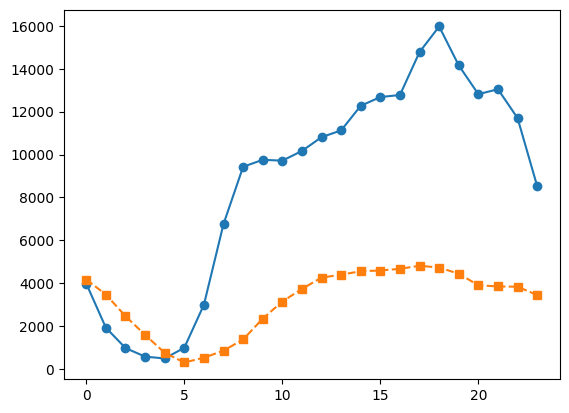

In [749]:
traffic_trends1 = zones_df.groupby(["pickup_hour", "day_type"]).size().unstack()
plt.plot(traffic_trends1.index, traffic_trends1["Weekday"], label="Weekdays", marker="o", linestyle="-")
plt.plot(traffic_trends1.index, traffic_trends1["Weekend"], label="Weekends", marker="s", linestyle="--")


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [769]:
# Find top 10 pickup and dropoff zones
# Identify top 10 pickup and dropoff zones
top_pickup_zones = zones_df.groupby("Pickup_zone")["LocationID"].count().nlargest(10).index.tolist()
top_dropoff_zones = zones_df.groupby("Pickup_zone")["DOLocationID"].count().nlargest(10).index.tolist()

# Filter data for these zones
top_pickup_zone_wise = zones_df[zones_df["Pickup_zone"].isin(top_pickup_zones)]
top_dropoff_zone_wise = zones_df[zones_df["Pickup_zone"].isin(top_dropoff_zones)]

# Compute hourly trends
pickup_trend = top_pickup_zone_wise.groupby(["pickup_hour", "Pickup_zone"])["LocationID"].count().unstack()
dropoff_trend = top_dropoff_zone_wise.groupby(["pickup_hour", "Pickup_zone"])["DOLocationID"].count().unstack()

pickup_trend.columns

Index(['JFK Airport', 'LaGuardia Airport', 'Lincoln Square East',
       'Midtown Center', 'Midtown East', 'Murray Hill',
       'Penn Station/Madison Sq West', 'Times Sq/Theatre District',
       'Upper East Side North', 'Upper East Side South'],
      dtype='object', name='Pickup_zone')

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [799]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = zones_df["LocationID"].value_counts().reset_index(name="Pickup")
dropoff_counts = zones_df["DOLocationID"].value_counts().rename_axis("LocationID").reset_index(name="Dropoff")

pickup_dropoff_ratios = pickup_counts.merge(dropoff_counts, on="LocationID", how="outer").fillna(0)
pickup_dropoff_ratios["Pickup_Dropoff_Ratio"] = pickup_dropoff_ratios["Pickup"] / pickup_dropoff_ratios["Dropoff"]
pickup_dropoff_ratios = pickup_dropoff_ratios.merge(zones, on="LocationID", how="left")[["zone", "Pickup", "Dropoff", "Pickup_Dropoff_Ratio"]]

top_10_ratios = pickup_dropoff_ratios.sort_values(by="Pickup_Dropoff_Ratio", ascending=False).head(10)
bottom_10_ratios = pickup_dropoff_ratios.sort_values(by="Pickup_Dropoff_Ratio", ascending=True).head(10)

print("Top 10 Zones with Highest Pickup or Dropoff Ratios:")
top_10_ratios

Top 10 Zones with Highest Pickup or Dropoff Ratios:


zone   Pickup  Dropoff  Pickup_Dropoff_Ratio
65                  East Elmhurst   1284.0       93             13.806452
121                   JFK Airport  12882.0     2744              4.694606
127             LaGuardia Airport  10258.0     3558              2.883080
202                 South Jamaica     28.0       15              1.866667
175  Penn Station/Madison Sq West   9716.0     6028              1.611812
40                   Central Park   4895.0     3466              1.412291
236                  West Village   6909.0     5077              1.360843
103       Greenwich Village South   3865.0     2893              1.335983
151                  Midtown East  10701.0     8284              1.291767
93               Garment District   4284.0     3524              1.215664

In [803]:
print("Bottom 10 Zones with Lowest Pickup or Dropoff Ratios:")
bottom_10_ratios

Bottom 10 Zones with Lowest Pickup or Dropoff Ratios:


zone  Pickup  Dropoff  Pickup_Dropoff_Ratio
1               Allerton/Pelham Gardens     0.0        9                   0.0
3                         Arden Heights     0.0        1                   0.0
6                          Astoria Park     0.0        3                   0.0
9                            Bath Beach     0.0       10                   0.0
13              Bay Terrace/Fort Totten     0.0       13                   0.0
14                              Bayside     0.0       35                   0.0
17                            Bellerose     0.0       20                   0.0
16                         Bedford Park     0.0        7                   0.0
24  Breezy Point/Fort Tilden/Riis Beach     0.0        7                   0.0
27                        Broad Channel     0.0        2                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [807]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_night = zones_df[(zones_df["pickup_hour"] >= 23) | (zones_df["pickup_hour"] <= 5)]

night_pickups = df_night["LocationID"].value_counts().rename_axis("LocationID").reset_index(name="Night Pickups")
night_dropoffs = df_night["DOLocationID"].value_counts().rename_axis("LocationID").reset_index(name="Night Drop-offs")
night_pickups = night_pickups.merge(zones, on="LocationID", how="left")[["zone", "borough", "Night Pickups"]]
night_dropoffs = night_dropoffs.merge(zones, on="LocationID", how="left")[["zone", "borough", "Night Drop-offs"]]

top_night_pickups = night_pickups.head(10)
top_night_dropoffs = night_dropoffs.head(10)
print("Top 10 Night Time Pickup Zones (11pm to 5am):")
top_night_pickups


Top 10 Night Time Pickup Zones (11pm to 5am):


zone    borough  Night Pickups
0                  East Village  Manhattan           2575
1                  West Village  Manhattan           2147
2                   JFK Airport     Queens           1944
3               Lower East Side  Manhattan           1619
4                  Clinton East  Manhattan           1570
5       Greenwich Village South  Manhattan           1401
6     Times Sq/Theatre District  Manhattan           1259
7  Penn Station/Madison Sq West  Manhattan           1054
8             LaGuardia Airport     Queens            987
9                 Midtown South  Manhattan            944

In [809]:
print("Top 10 Nighttime Drop-off Zones (11pm to 5am):")
top_night_dropoffs

Top 10 Nighttime Drop-off Zones (11pm to 5am):


zone    borough  Night Drop-offs
0                   East Village  Manhattan             1395
1                   Clinton East  Manhattan             1076
2                    Murray Hill  Manhattan             1056
3                       Gramercy  Manhattan              974
4                Lenox Hill West  Manhattan              925
5                   East Chelsea  Manhattan              902
6                 Yorkville West  Manhattan              873
7                   West Village  Manhattan              802
8          Upper East Side North  Manhattan              766
9  Sutton Place/Turtle Bay North  Manhattan              740

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [819]:
# Filter for night hours (11 PM to 5 AM)
zones_df_night = zones_df[(zones_df["pickup_hour"] >= 23) | (zones_df["pickup_hour"] <= 5)]
print("Total night trips:")
zones_df_night.shape[0]


Total night trips:


33645

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [829]:
zones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284585 entries, 0 to 284584
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   VendorID                     284585 non-null  int64         
 1   tpep_pickup_datetime         284585 non-null  datetime64[us]
 2   tpep_dropoff_datetime        284585 non-null  datetime64[us]
 3   passenger_count              284585 non-null  float64       
 4   trip_distance                284585 non-null  float64       
 5   RatecodeID                   284585 non-null  float64       
 6   LocationID                   284585 non-null  int64         
 7   DOLocationID                 284585 non-null  int64         
 8   payment_type                 284585 non-null  int64         
 9   fare_amount                  284585 non-null  float64       
 10  extra                        284585 non-null  float64       
 11  mta_tax                   

In [892]:
# Analyse the fare per mile per passenger for different passenger counts
df_valid_fares = zones_df[(zones_df["trip_distance"] > 0) & (zones_df["passenger_count"] > 0)].copy()
df_valid_fares["fare_per_mile"] = df_valid_fares["fare_amount"] / df_valid_fares["trip_distance"]
df_valid_fares["fare_per_mile_per_passenger"] = df_valid_fares["fare_per_mile"] / df_valid_fares["passenger_count"]
fare_analysis = df_valid_fares.groupby("passenger_count")[["fare_per_mile", "fare_per_mile_per_passenger"]].mean()
print("Avg fare per mile per passenger for different passenger counts:")
fare_analysis



Avg fare per mile per passenger for different passenger counts:


fare_per_mile  fare_per_mile_per_passenger
passenger_count                                            
1.0                   9.114344                     9.114344
2.0                  10.625405                     5.312702
3.0                  11.730272                     3.910091
4.0                  12.572213                     3.143053
5.0                   7.563956                     1.512791
6.0                   7.593162                     1.265527

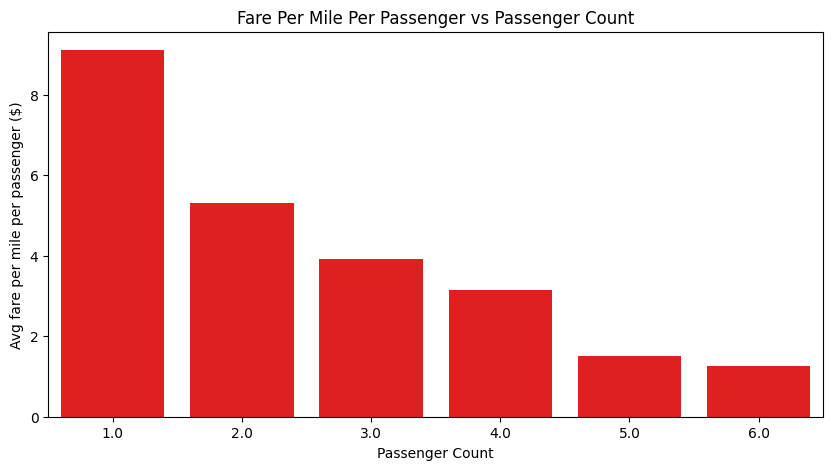

In [890]:
plt.figure(figsize=(10, 5))
sns.barplot(x=fare_analysis.index, y=fare_analysis["fare_per_mile_per_passenger"], color="red")
plt.xlabel("Passenger Count")
plt.ylabel("Avg fare per mile per passenger ($)")
plt.title("Fare Per Mile Per Passenger vs Passenger Count")
plt.xticks(rotation=0)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

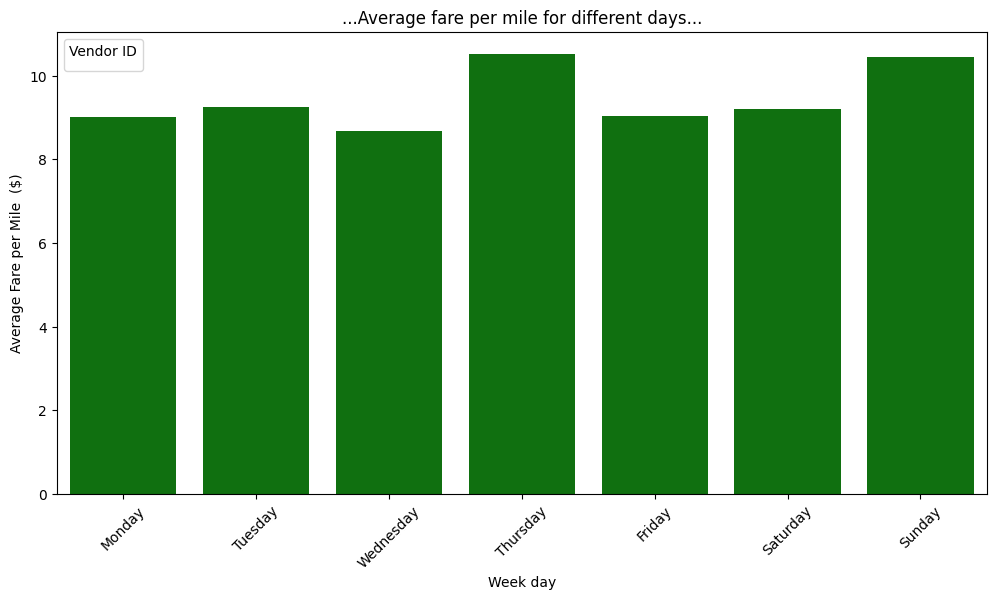

In [916]:
# Compare the average fare per mile for different days and for different times of the day
df_valid_fares = zones_df[zones_df["trip_distance"] > 0].copy()
df_valid_fares["fare_per_mile"] = df_valid_fares["fare_amount"] / df_valid_fares["trip_distance"]
df_valid_fares["pickup_day"] = df_valid_fares["tpep_pickup_datetime"].dt.dayofweek
df_valid_fares["pickup_hour"] = df_valid_fares["tpep_pickup_datetime"].dt.hour


fare_by_day = df_valid_fares.groupby("pickup_day")["fare_per_mile"].mean()
days_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(12, 6))
sns.barplot(x=days_labels, y=fare_by_day.values, color="green")
plt.xlabel('Week day')
plt.ylabel('Average Fare per Mile  ($)')
plt.title('...Average fare per mile for different days...')
plt.legend(title='Vendor ID')
plt.xticks(rotation=45)
plt.show()

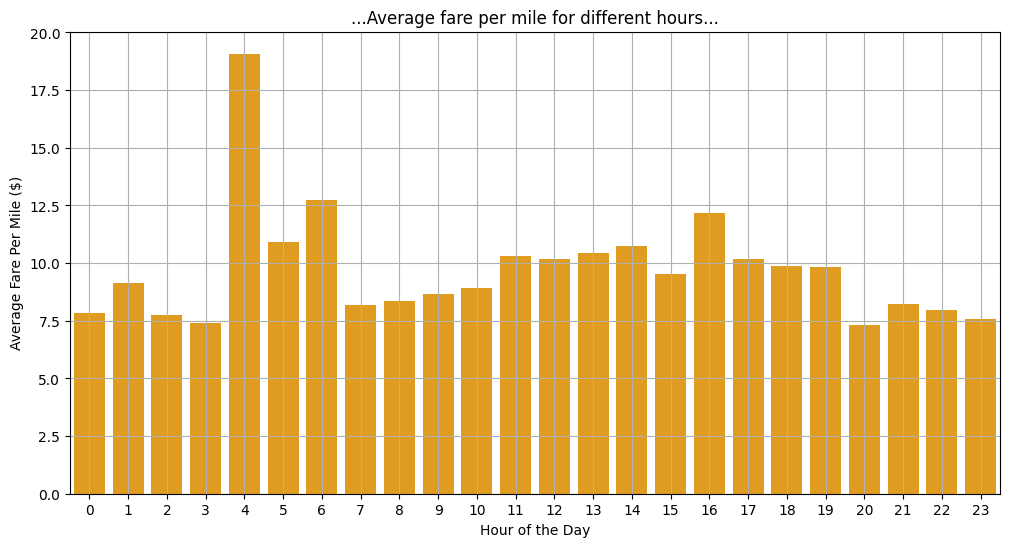

In [918]:
fare_by_hour = df_valid_fares.groupby("pickup_hour")["fare_per_mile"].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=fare_by_hour.index, y=fare_by_hour.values, color="orange")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("...Average fare per mile for different hours...")
plt.xticks(range(24))
plt.grid()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

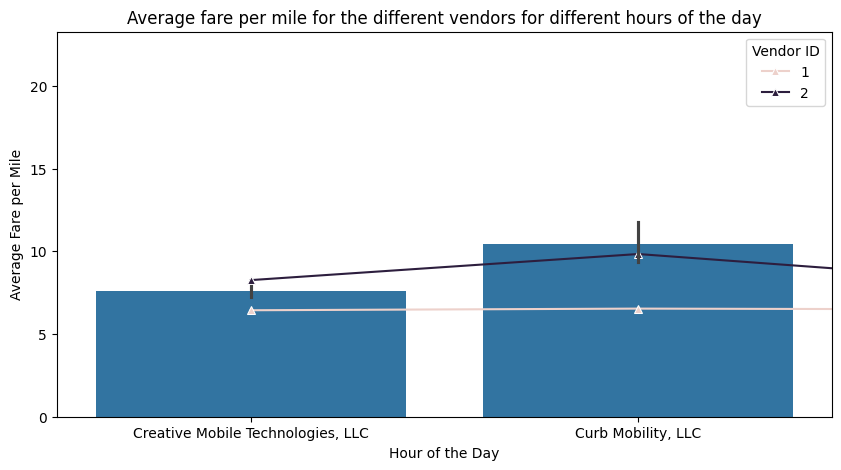

In [960]:
# Compare fare per mile for different vendors

vendor_labels = {1: "Creative Mobile Technologies, LLC", 2: "Curb Mobility, LLC",
                6: "Myle Technologies Inc", 7: "Helix"}

avg_fare_per_vendor_hour = zones_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(10, 5))
avg_fare_per_vendor_hour["Vendor"] = avg_fare_per_vendor_hour["VendorID"].map(vendor_labels)
sns.lineplot(data=avg_fare_per_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker="^")
# sns.lineplot(x=avg_fare_per_vendor_hour["Vendor"], y=avg_fare_per_vendor_hour['fare_per_mile'], marker="^")
sns.barplot(x=avg_fare_per_vendor_hour["Vendor"], y=avg_fare_per_vendor_hour['fare_per_mile'])
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average fare per mile for the different vendors for different hours of the day')
plt.legend(title='Vendor ID')
plt.show()


Average Fare Per Mile by Vendor and Hour of the Day:
   VendorID  pickup_hour  fare_per_mile
0         1            0       6.436954
1         1            1       6.536222
2         1            2       6.487415
3         1            3       6.301017
4         1            4       7.251415
5         1            5       7.954609
6         1            6       6.316077
7         1            7       6.979273
8         1            8       7.989250
9         1            9       8.049961


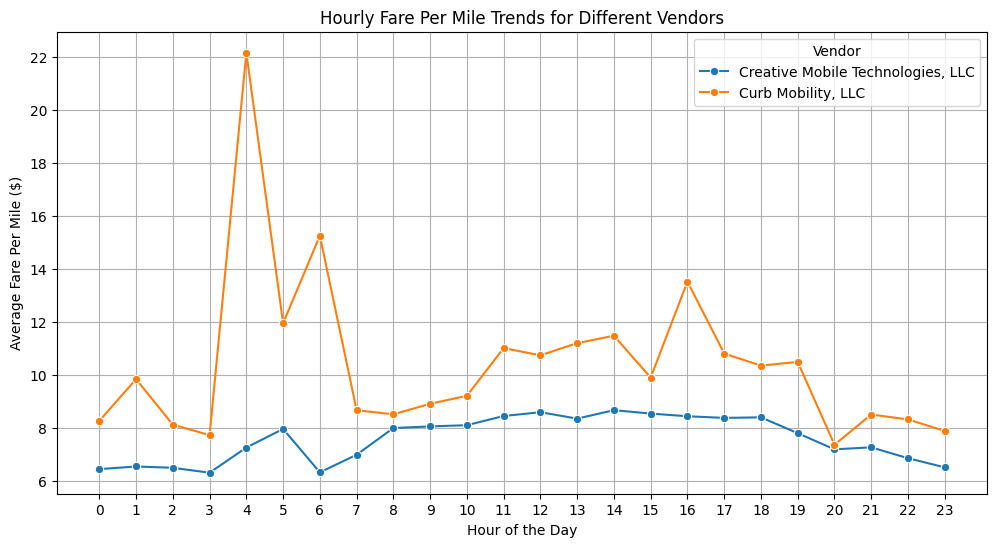

In [966]:
df_valid_fares = zones_df[zones_df["trip_distance"] > 0].copy()
df_valid_fares["fare_per_mile"] = df_valid_fares["fare_amount"] / df_valid_fares["trip_distance"]
df_valid_fares["pickup_hour"] = df_valid_fares["tpep_pickup_datetime"].dt.hour
fare_by_vendor_hour = df_valid_fares.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()
print("Average Fare Per Mile by Vendor and Hour of the Day:")
print(fare_by_vendor_hour.head(10))
vendor_labels = {1: "Creative Mobile Technologies, LLC", 2: "Curb Mobility, LLC",
                6: "Myle Technologies Inc", 7: "Helix"}

fare_by_vendor_hour["Vendor"] = fare_by_vendor_hour["VendorID"].map(vendor_labels)

plt.figure(figsize=(12, 6))
sns.lineplot(x="pickup_hour", y="fare_per_mile", hue="Vendor", data=fare_by_vendor_hour, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Hourly Fare Per Mile Trends for Different Vendors")
plt.xticks(range(24))
plt.legend(title="Vendor")
plt.grid()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [978]:
# Defining distance tiers
df_valid_fares = zones_df[zones_df["trip_distance"] > 0].copy()
df_valid_fares["fare_per_mile"] = df_valid_fares["fare_amount"] / df_valid_fares["trip_distance"]
def distance_tiers(distance):
    if distance <= 2:
        return "Less than 2 miles"
    elif distance <= 5:
        return "2-5 miles"
    else:
        return "More than 5 miles"
        
df_valid_fares["distance_category"] = df_valid_fares["trip_distance"].apply(distance_tiers)
fare_by_vendor_distance = df_valid_fares.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()
vendor_labels = {1: "Creative Mobile Technologies, LLC", 2: "Curb Mobility, LLC",
                6: "Myle Technologies Inc", 7: "Helix"}
fare_by_vendor_distance["Vendor"] = fare_by_vendor_distance["VendorID"].map(vendor_labels)
print("Average Fare Per Mile by Vendor and Distance Category...")
fare_by_vendor_distance


Average Fare Per Mile by Vendor and Distance Category...


VendorID  distance_category  fare_per_mile  \
0         1          2-5 miles       6.358091   
1         1  Less than 2 miles       9.432423   
2         1  More than 5 miles       4.458791   
3         2          2-5 miles       6.543276   
4         2  Less than 2 miles      13.516067   
5         2  More than 5 miles       4.499989   

                              Vendor  
0  Creative Mobile Technologies, LLC  
1  Creative Mobile Technologies, LLC  
2  Creative Mobile Technologies, LLC  
3                 Curb Mobility, LLC  
4                 Curb Mobility, LLC  
5                 Curb Mobility, LLC

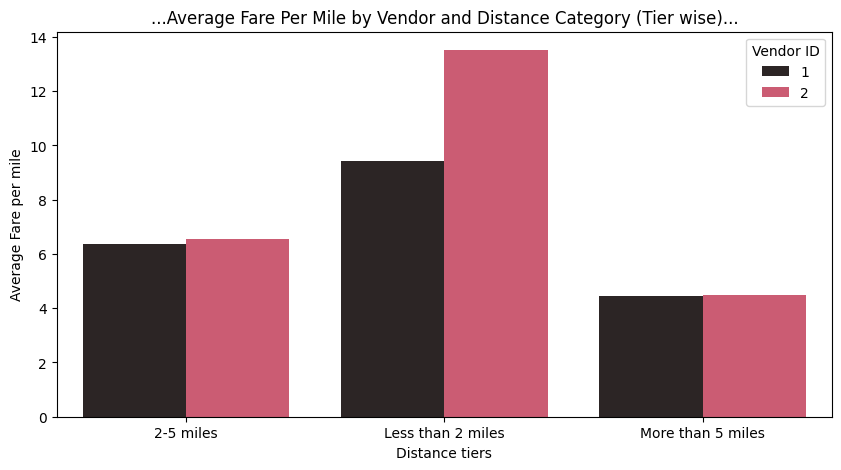

In [1024]:
zones_df["distance_category"] = df_valid_fares["trip_distance"].apply(distance_tiers)
plt.figure(figsize=(10, 5))
cmap = plt.get_cmap("magma")
norm = plt.Normalize(1, 6)
sns.barplot(data=fare_by_vendor_distance, x='distance_category', y='fare_per_mile', hue='VendorID', color=cmap(norm(4)))
plt.xlabel('Distance tiers')
plt.ylabel('Average Fare per mile')
plt.title('...Average Fare Per Mile by Vendor and Distance Category (Tier wise)...')
plt.legend(title='Vendor ID')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

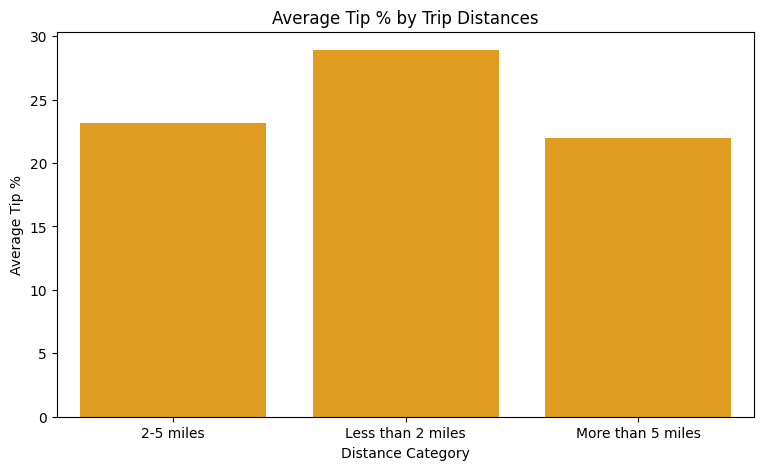

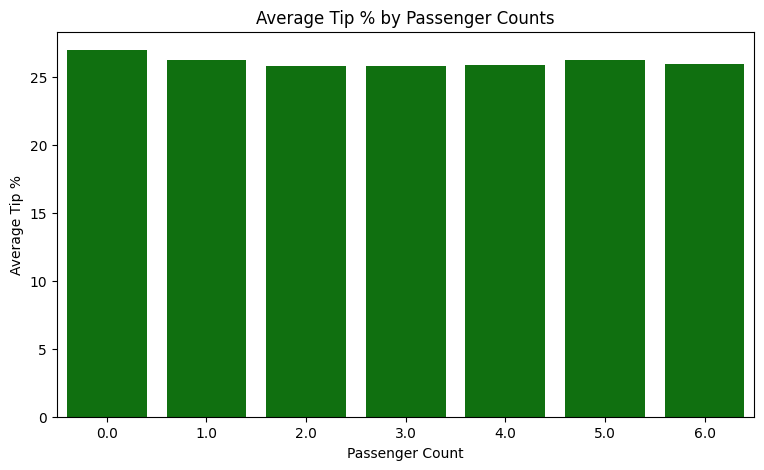

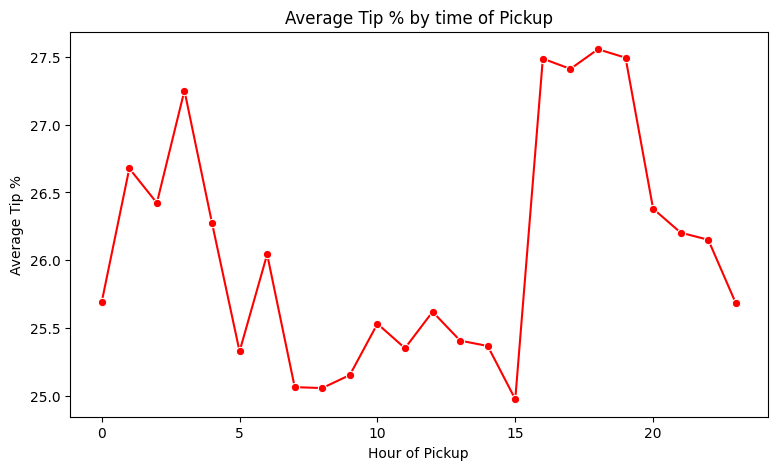

In [1052]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
zones_df['tip_percentage'] = (zones_df.tip_amount / zones_df.fare_amount) * 100
tip_by_distances = zones_df.groupby('distance_category').tip_percentage.mean().reset_index()
tip_by_passenger = zones_df.groupby('passenger_count').tip_percentage.mean().reset_index()
tip_by_pickup_hour = zones_df.groupby('pickup_hour').tip_percentage.mean().reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(data=tip_by_distances, x='distance_category', y='tip_percentage', color='orange')
plt.title('Average Tip % by Trip Distances')
plt.xlabel('Distance Category')
plt.ylabel('Average Tip %')
plt.show()

plt.figure(figsize=(9, 5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', color='green')
plt.title('Average Tip % by Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')
plt.show()

plt.figure(figsize=(9, 5))
sns.lineplot(data=tip_by_pickup_hour, x='pickup_hour', y='tip_percentage', marker='o' , color='red')
plt.title('Average Tip % by time of Pickup')
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Tip %')
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

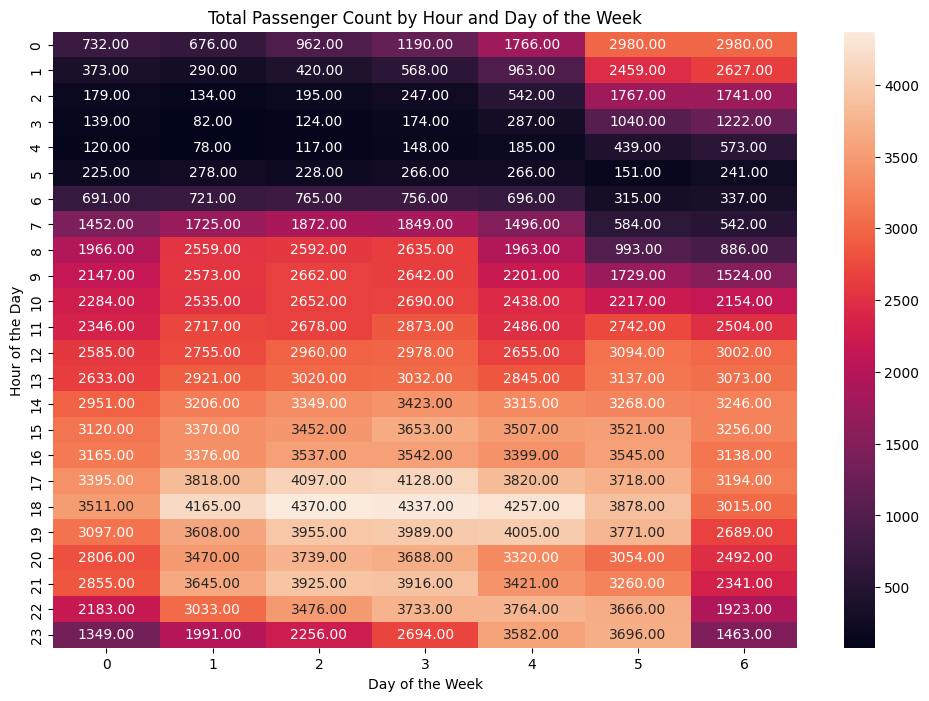

In [1068]:
# See how passenger count varies across hours and days
passenger_df = zones_df[['passenger_count','pickup_hour','pickup_day']].copy()

grouped = passenger_df.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].sum().reset_index()

# Pivot the grouped data (rows: hour, columns: day of week)
pivot_table = grouped.pivot(index='pickup_hour', columns='pickup_day', values='passenger_count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Total Passenger Count by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1088]:
# How does passenger count vary across zones
passenger_by_zone = zones_df.groupby('LocationID')['passenger_count'].sum().reset_index()
passenger_by_zone_sorted = passenger_zone.sort_values(by='passenger_count', ascending=False)
avg_passenger_by_zone = zones_df.groupby("LocationID")["passenger_count"].mean().reset_index()


avg_passenger_by_zone.head()

LocationID  passenger_count
0           1         1.833333
1           4         1.397770
2           6         3.000000
3           7         1.250000
4           9         1.000000

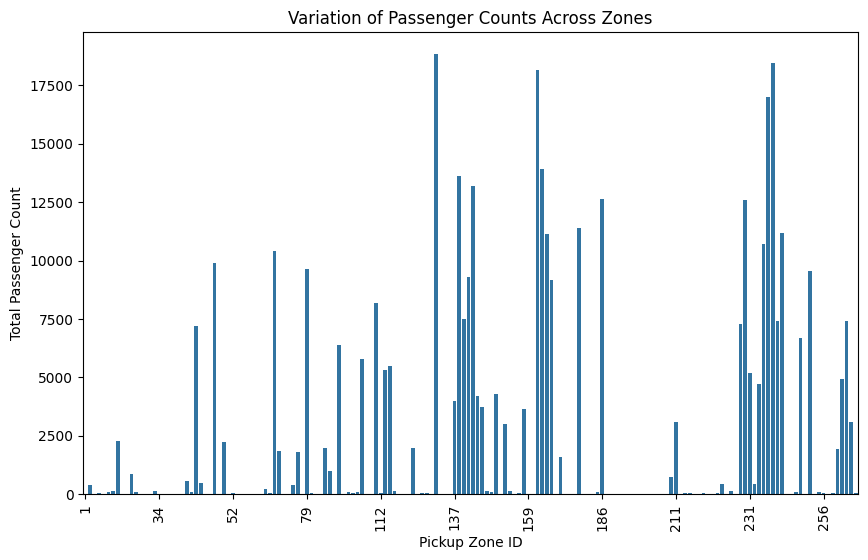

In [1108]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LocationID', y='passenger_count', data=passenger_by_zone_sorted)
plt.xlabel('Pickup Zone ID')
plt.ylabel('Total Passenger Count')
plt.title('Variation of Passenger Counts Across Zones')
plt.xticks(ticks=range(0, len(passenger_by_zone_sorted), len(passenger_by_zone_sorted)//10),rotation=90)
plt.show()

In [1134]:
df_valid_passengers = zones_df[zones_df["passenger_count"] > 0].copy()
passenger_by_zone = df_valid_passengers.groupby("LocationID")["passenger_count"].sum().reset_index()
avg_passenger_by_zone = df_valid_passengers.groupby("LocationID")["passenger_count"].mean().reset_index()
passenger_zone_wise = passenger_by_zone.merge(zones, on="LocationID", how="left")[["zone", "borough", "passenger_count"]]
avg_passenger_zone_wise = avg_passenger_by_zone.merge(zones, on="LocationID", how="left")[["zone", "borough", "passenger_count"]]
passenger_by_zone = passenger_zone_wise.sort_values(by="passenger_count", ascending=False)
avg_passenger_zone_wise = avg_passenger_zone_wise.sort_values(by="passenger_count", ascending=False)

print("Top 10 Zones with Highest Total Passenger Count:")
print(passenger_zone_wise.head(10))

print("\nTop 10 Zones with Highest Average Passenger Count per Trip:")
print(avg_passenger_zone_wise.head(10))

Top 10 Zones with Highest Total Passenger Count:
                      zone        borough  passenger_count
0           Newark Airport            EWR             11.0
1            Alphabet City      Manhattan            376.0
2  Arrochar/Fort Wadsworth  Staten Island              3.0
3                  Astoria         Queens             60.0
4               Auburndale         Queens              1.0
5             Baisley Park         Queens             97.0
6             Battery Park      Manhattan            134.0
7        Battery Park City      Manhattan           2274.0
8                Bay Ridge       Brooklyn              1.0
9                  Bedford       Brooklyn              9.0

Top 10 Zones with Highest Average Passenger Count per Trip:
                        zone        borough  passenger_count
27        Claremont/Bathgate          Bronx            5.000
109          Oakland Gardens         Queens            3.500
2    Arrochar/Fort Wadsworth  Staten Island            3.0

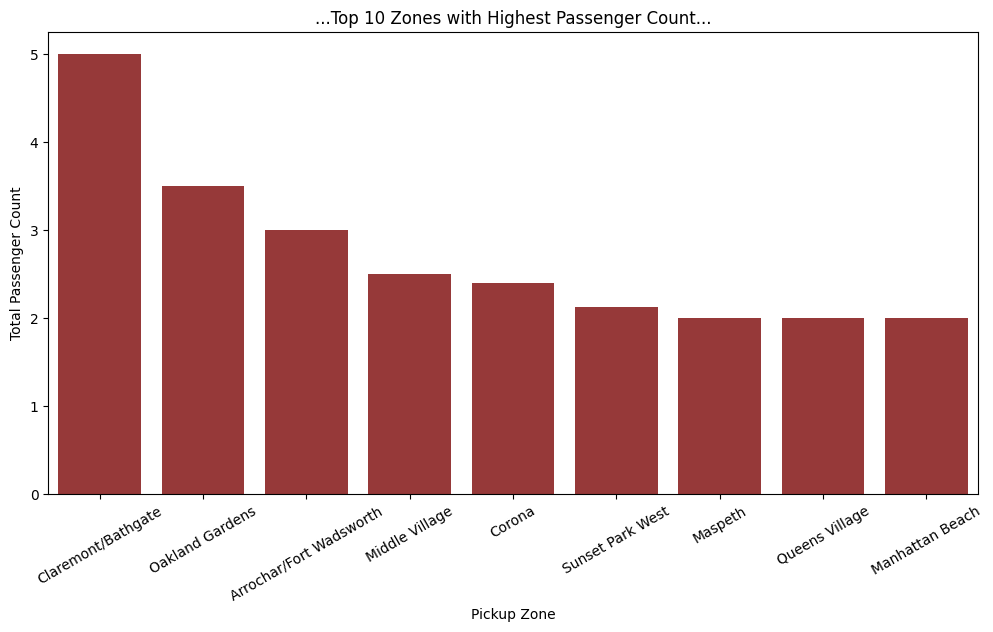

In [1138]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_passenger_zone_wise["zone"].head(10), 
            y=avg_passenger_zone_wise["passenger_count"].head(10), color="brown")
plt.xlabel("Pickup Zone")
plt.ylabel("Total Passenger Count")
plt.title("...Top 10 Zones with Highest Passenger Count...")
plt.xticks(rotation=30)
plt.show()

In [1150]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
df_passengers_count = zones_df[zones_df["passenger_count"] > 0].copy()
avg_passenger_by_zone = df_passengers_count.groupby("LocationID")["passenger_count"].mean().reset_index()
avg_passenger_by_zone.rename(columns={"passenger_count": "Avg_Passenger_Count"}, inplace=True)
zones_avg = zones.merge(avg_passenger_by_zone, on="LocationID", how="left")
zones_avg["Avg_Passenger_Count"] = zones["Avg_Passenger_Count"].fillna(0)
print(zones_avg[["zone", "borough", "Avg_Passenger_Count"]].head(10))


                      zone        borough  Avg_Passenger_Count
0           Newark Airport            EWR             1.833333
1              Jamaica Bay         Queens             0.000000
2  Allerton/Pelham Gardens          Bronx             0.000000
3            Alphabet City      Manhattan             1.418868
4            Arden Heights  Staten Island             0.000000
5  Arrochar/Fort Wadsworth  Staten Island             3.000000
6                  Astoria         Queens             1.250000
7             Astoria Park         Queens             0.000000
8               Auburndale         Queens             1.000000
9             Baisley Park         Queens             1.515625


Find out how often surcharges/extra charges are applied to understand their prevalance

In [1156]:
surcharge = zones_df[zones_df['extra'] > 0].shape[0]
total_trips = zones_df.shape[0]
surcharge_percentage = (surcharge / total_trips) * 100

print(f"Total Trips with Surcharge: {surcharge}")
print(f"Percentage of Trips with Surcharge: {surcharge_percentage:.2f}%")

Total Trips with Surcharge: 179509
Percentage of Trips with Surcharge: 63.45%


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<Figure size 1500x1000 with 0 Axes>

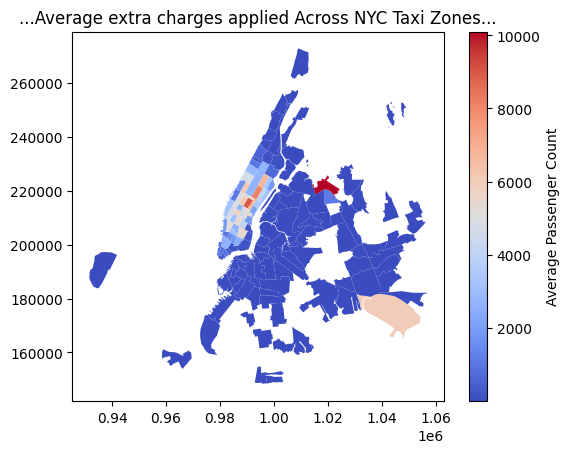

In [1177]:
# How often is each surcharge applied?
extra_charges = zones_df[zones_df['extra'] > 0]
pickup_zone_extra_charges = extra_charges.groupby('LocationID').size().reset_index(name='extra_charges_count')
zones_extra_charges = zones.merge(pickup_zone_extra_charges, on='LocationID', how='left')
plt.figure(figsize=(15, 10))
zones_extra_charges.plot(column='extra_charges_count', cmap='coolwarm', legend=True, linewidth=0.5, legend_kwds={"label": "Average Passenger Count"})
plt.title('...Average extra charges applied Across NYC Taxi Zones...')
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Answers
- Deamnd for cabs at evening hours around 4pm - 8pm. So better to send more cabs to peak pickup zones in early evening's.
- Need to send some more cabs to high demand zones during late-night.
- Round trips can be maximized with nearby pickup zones at drop-off point. 
- Real-time analysis can be used for pickup and drop-off points for the cabs.
- Most of the passenger's are using credit card payments.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Answers
- JFK Airport and LaGuardia Airport having high-demand Pickup points
	- During early mornings (4 AM - 9 AM) → Peak arrival times for business travelers
	- Evenings (4 PM - 9 PM) → High volume of flights arriving
	- Late nights (10 PM - 1 AM) → International flights arrival

- High Pickup zones -> Airports, Midtown East and Penn Station/Madison Sq West
- High Dropoff zones -> Midtown East, Penn Station/Madison Sq West and West Village


- Weekdays - Mon to Fri
	- Business/ Office travellers during early moring and evening.
	- Better to have cabs at office districts during weekdays.
- Friday night & Saturday's
	- More cabs in entertainment districts for nightlife rush.
	- Ensure coverage after midnight when demand spikes at night.
- Sunday's
	- Some demand for airport's.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Answers
- Need to have surcharge/ extra charges especially during peek hours and zones.
- During non-peak hours, better to give credit-card offers, to get more booking and as most of the users are paying via credit-card.
- Customer Service is atmost important, so we need to notify about surcharge/extra pricing.